<h3>LIBRAIRIES</h3>

In [2]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

<h3>ETL</h3>

In [3]:
# I extract the file from a local CSV and convert to DataFrame.
df = pd.read_csv('singapore_airlines_reviews.csv')
pd.DataFrame(df)

,published_date,published_platform,rating,type,text,title,helpful_votes
0,2024-03-12T14:41:14-04:00,Desktop,3,review,We used this airline to go from Singapore to L...,Ok,0
1,2024-03-11T19:39:13-04:00,Desktop,5,review,The service on Singapore Airlines Suites Class...,The service in Suites Class makes one feel lik...,0
2,2024-03-11T12:20:23-04:00,Desktop,1,review,"Booked, paid and received email confirmation f...",Don’t give them your money,0
3,2024-03-11T07:12:27-04:00,Desktop,5,review,"Best airline in the world, seats, food, servic...",Best Airline in the World,0
4,2024-03-10T05:34:18-04:00,Desktop,2,review,Premium Economy Seating on Singapore Airlines ...,Premium Economy Seating on Singapore Airlines ...,0
...,...,...,...,...,...,...,...
9995,2018-08-06T03:48:21-04:00,Desktop,5,review,First part done with Singapore Airlines - acce...,"Flew to NZ 1st half Singapore Airlines, 2nd ha...",1
9996,2018-08-05T22:50:29-04:00,Mobile,5,review,And again a great Flight with Singapore Air. G...,Best Airline,1
9997,2018-08-05T22:47:06-04:00,Desktop,5,review,"We flew business class from Frankfurt, via Sin...",Superb service on Singapore Airlines,1
9998,2018-08-05T20:32:03-04:00,Desktop,4,review,"As always, the A380 aircraft was spotlessly pr...",A Comfortable Fiight Spoiled by lack of adequa...,2


In [4]:
# Check data type and count non-null rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      10000 non-null  object
 1   published_platform  10000 non-null  object
 2   rating              10000 non-null  int64 
 3   type                10000 non-null  object
 4   text                10000 non-null  object
 5   title               9999 non-null   object
 6   helpful_votes       10000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 547.0+ KB


In [5]:
# Drop null rows.
df.dropna(inplace=True)

In [6]:
# When converting to datetime, the need arises to indicate the time zone. 
df['published_date'] = pd.to_datetime(df['published_date'], format='mixed', utc=True)
df['published_date'] = pd.to_datetime(df['published_date']).dt.strftime('%Y/%m/%d %H:%M:%S')
df['published_date'] = pd.to_datetime(df['published_date']) 
# I use datetime on the column again so that it modifies the data type.

In [7]:
# Check the data type of the last modification.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   published_date      9999 non-null   datetime64[ns]
 1   published_platform  9999 non-null   object        
 2   rating              9999 non-null   int64         
 3   type                9999 non-null   object        
 4   text                9999 non-null   object        
 5   title               9999 non-null   object        
 6   helpful_votes       9999 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 624.9+ KB


In [8]:
#I check unique values, don't detected erroneous data.
print("published_platform:", df['published_platform'].unique())
print("rating:", df['rating'].unique())
print("type:", df['type'].unique())

published_platform: ['Desktop' 'Mobile']
rating: [3 5 1 2 4]
type: ['review']


In [9]:
# Drop the title column because I want to focus on the text of the reviews to do a sentiment analysis.
df.drop(columns='title', inplace=True)

# Drop the type column because this dataset ONLY contains reviews. I consider it unnecessary.
df.drop(columns='type', inplace=True)

In [10]:
# I define a function to do the sentiment analysis.
def sentiment_analysis(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return '2' #positive
    elif analysis.sentiment.polarity == 0:
        return '1' #neutral
    elif analysis.sentiment.polarity < 0:
        return '0' #negative
    else: 
        return '1'

In [11]:
# Apply the function to the text column.
df['sentiment_analysis'] = df['text'].apply(sentiment_analysis)

In [12]:
# Check the dataset.
df.head(10)

,published_date,published_platform,rating,text,helpful_votes,sentiment_analysis
0,2024-03-12 18:41:14,Desktop,3,We used this airline to go from Singapore to L...,0,2
1,2024-03-11 23:39:13,Desktop,5,The service on Singapore Airlines Suites Class...,0,2
2,2024-03-11 16:20:23,Desktop,1,"Booked, paid and received email confirmation f...",0,0
3,2024-03-11 11:12:27,Desktop,5,"Best airline in the world, seats, food, servic...",0,2
4,2024-03-10 09:34:18,Desktop,2,Premium Economy Seating on Singapore Airlines ...,0,0
5,2024-03-10 06:16:48,Desktop,1,We booked our flights a full 9 months in advan...,0,0
6,2024-03-10 05:54:43,Desktop,5,This was a fascinating experience. As I sat in...,0,2
7,2024-03-09 22:45:56,Desktop,1,Very bad expeirence for flight check in at bai...,0,0
8,2024-03-09 04:10:41,Desktop,1,"Respected Faculty, I am Bincy, writing this t...",0,2
9,2024-03-09 00:18:57,Desktop,1,I would rate Singapore airlines the worse I ha...,1,0


<h3>EDA</h3>

<p>As we could see, that dataset is composed of user reviews, and contains a count of interactions from other "helpful_votes". We are going to focus on how users interact and what opinions they have about their experience.</p>

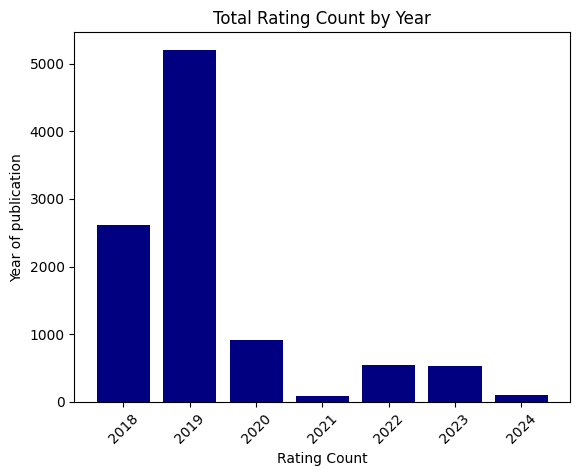

In [49]:
data = df['rating'].groupby(df['published_date'].dt.year).count()
plt.bar(data.index, data.values, color='navy')

plt.xlabel('Rating Count')
plt.ylabel('Year of publication')
plt.title('Total Rating Count by Year')
plt.xticks(rotation=45)

plt.show()

<p>Counting the number of reviews per year, the level of interaction on the platforms has decreased in recent years.</p>

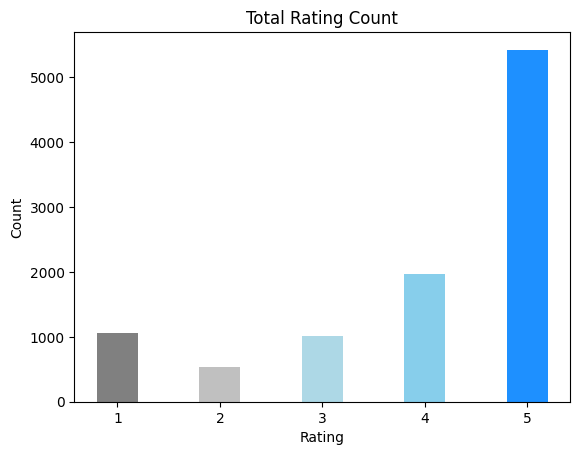

In [37]:
data = df['rating']

value_counts = data.value_counts()

plt.bar(value_counts.index, value_counts.values, color=['dodgerblue','skyblue','grey','lightblue','silver'], width=0.4)

plt.xticks()


plt.title('Total Rating Count')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the graphic
plt.show()

<p>Analyzing the rating of the comments, we can see that the highest values ​​stand out, 4 and 5. This could indicate positive evaluations.</p>

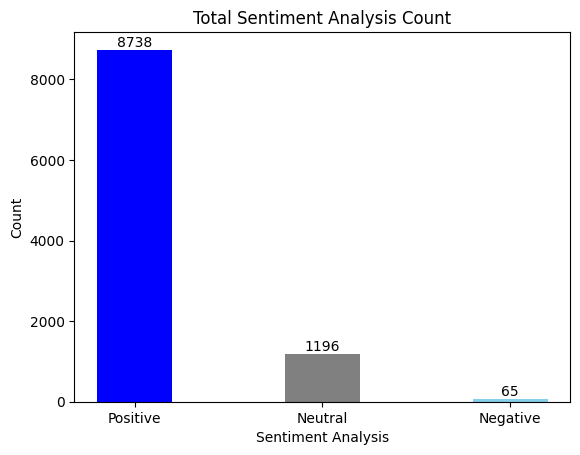

In [14]:
data = df['sentiment_analysis']

value_counts = data.value_counts()

plt.bar(value_counts.index, value_counts.values, color=['blue','grey','skyblue'], width=0.4)

plt.xticks([0, 1, 2], ['Positive', 'Neutral', 'Negative'])


for i, valor in enumerate(value_counts):
    plt.text(i, valor, str(valor), ha='center', va='bottom')


plt.title('Total Sentiment Analysis Count')
plt.xlabel('Sentiment Analysis')
plt.ylabel('Count')

# Show the graphic
plt.show()

<p>After analyzing the sentiments of the reviews, we can affirm with this graph that the users had a good experience, because almost all of the comments were positive.</p>

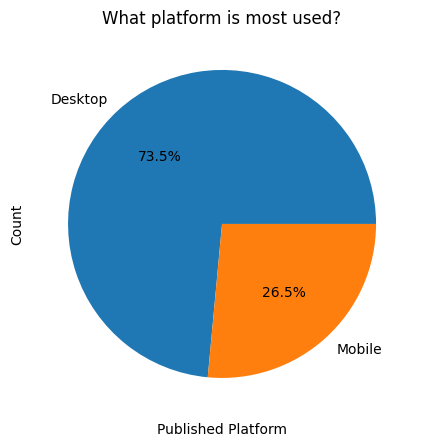

In [25]:
labels = df['published_platform'].unique()
sizes = df['published_platform'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

plt.title('What platform is most used?')
plt.xlabel('Published Platform')
plt.ylabel('Count')

# Show the graphic
plt.show()

<p>In this last graph, we can see that users use the desktop platform more. Could this indicate any problem with the mobile version? Are there improvements to continue making to the desktop platform? </p>